In [22]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from librosa import feature as ft
from librosa import display
import librosa



In [6]:
!ls "./Data/genres_original"

blues  classical  country  disco  hiphop  jazz	metal  pop  reggae  rock


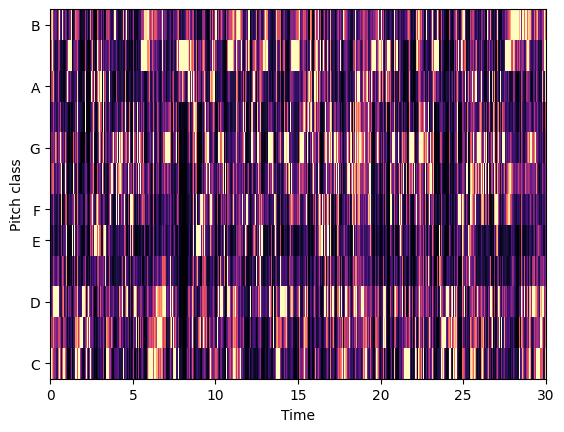

In [23]:
audio_file = librosa.load("Data/genres_original/blues/blues.00000.wav")
fs = audio_file[1]
arr = audio_file[0]
t = np.arange(0, len(arr)/fs, 1/fs)
T = t[-1]
arr = np.array(arr, dtype=float)
asdf = ft.chroma_stft(y=arr, sr=fs, n_fft=2048, hop_length=512)
display.specshow(asdf, y_axis='chroma', x_axis='time')
plt.show()

In [45]:
def features(arr, sr=22050):
    features_dict = {}

    stft = ft.chroma_stft(y=arr, sr=sr, n_fft=2048, hop_length=512)
    rms = ft.rms(y=arr)
    cent = ft.spectral_centroid(y=arr, sr=sr)
    spec_bw = ft.spectral_bandwidth(y=arr, sr=sr)
    rolloff = ft.spectral_rolloff(y=arr, sr=sr)
    zcr = ft.zero_crossing_rate(y=arr)
    bandwidth = ft.spectral_bandwidth(y=arr, sr=sr)
    
    mfcc = ft.mfcc(y=arr, sr=sr, n_mfcc=20)

    mfccs = [mfcc[i] for i in range(0, 20)]
    mfcc_name = ['mfcc_{}'.format(i) for i in range(0, 20)]
    
    feature = [stft, rms, cent, spec_bw, rolloff, zcr, bandwidth]
    feature_name = ['stft', 'rms', 'cent', 'spec_bw', 'rolloff', 'zcr', 'bandwidth']
    

    for i in range(len(feature)):
        features_dict['{}_mean'.format(feature_name[i])] = np.mean(feature[i])
        features_dict['{}_var'.format(feature_name[i])] = np.var(feature[i])
    for i in range(len(mfccs)):
        features_dict['{}_mean'.format(mfcc_name[i])] = np.mean(mfccs[i])
        features_dict['{}_var'.format(mfcc_name[i])] = np.var(mfccs[i])
        

    return features_dict


In [46]:
import pathlib
from tqdm import tqdm

genres_dir = pathlib.Path("Data/genres_original/")
extracted_data = []

# def read_wav(file_path):
#     with wave.open(str(file_path), 'rb') as wf:
#         fs = wf.getframerate()
#         frames = wf.readframes(wf.getnframes())
#         samples = np.frombuffer(frames, dtype=np.int16)
#     return fs, samples

def process_file(file):
    try:
        arr, fs = librosa.load(file)
    except:
        return {}
    f = features(arr, fs)
    f["file"] = file.name
    return f

def process_genre(genre):
    genre_data = []
    for file in tqdm(list(genre.iterdir())):
        f = process_file(file)
        f["genre"] = genre.name
        genre_data.append(f)
    return genre_data

for genre in tqdm(genres_dir.iterdir()):
    print(genre)
    extracted_data += process_genre(genre)
    print(len(extracted_data))

0it [00:00, ?it/s]

Data/genres_original/blues


100%|██████████| 100/100 [00:28<00:00,  3.47it/s]
1it [00:28, 28.82s/it]

100
Data/genres_original/rock


100%|██████████| 100/100 [00:27<00:00,  3.68it/s]
2it [00:56, 27.86s/it]

200
Data/genres_original/jazz


100%|██████████| 100/100 [00:28<00:00,  3.52it/s]
3it [01:24, 28.12s/it]

300
Data/genres_original/metal


100%|██████████| 100/100 [00:27<00:00,  3.61it/s]
4it [01:52, 27.95s/it]

400
Data/genres_original/disco


100%|██████████| 100/100 [00:27<00:00,  3.61it/s]
5it [02:19, 27.86s/it]

500
Data/genres_original/reggae


100%|██████████| 100/100 [00:28<00:00,  3.54it/s]
6it [02:48, 28.00s/it]

600
Data/genres_original/classical


100%|██████████| 100/100 [00:28<00:00,  3.53it/s]
7it [03:16, 28.12s/it]

700
Data/genres_original/country


100%|██████████| 100/100 [00:28<00:00,  3.53it/s]
8it [03:44, 28.18s/it]

800
Data/genres_original/hiphop


100%|██████████| 100/100 [00:30<00:00,  3.31it/s]
9it [04:14, 28.82s/it]

900
Data/genres_original/pop


100%|██████████| 100/100 [00:29<00:00,  3.42it/s]
10it [04:44, 28.43s/it]

1000


In [47]:
df = pd.DataFrame(extracted_data)
df.index = df["file"]
df = df.drop(columns=["file"])
df = df.dropna(axis=0, how='any')
output_dir = genres_dir.parent.parent / "Output"
output_dir.mkdir(exist_ok=True)
df.to_csv(output_dir / "features.csv")

In [48]:
df.describe()

,stft_mean,stft_var,rms_mean,rms_var,cent_mean,cent_var,spec_bw_mean,spec_bw_var,rolloff_mean,rolloff_var,...,mfcc_15_mean,mfcc_15_var,mfcc_16_mean,mfcc_16_var,mfcc_17_mean,mfcc_17_var,mfcc_18_mean,mfcc_18_var,mfcc_19_mean,mfcc_19_var
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,9.990000e+02,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.378820,0.086347,0.130826,0.003051,2202.419119,4.698072e+05,2242.763943,136977.321493,4572.915033,1.843581e+06,...,1.150304,60.731245,-3.965957,62.620954,0.509594,63.698877,-2.329321,66.225031,-1.095186,70.079498
std,0.081684,0.007742,0.065671,0.003635,716.076969,4.009029e+05,526.517009,96409.827633,1575.066700,1.425086e+06,...,4.580871,33.796989,4.551857,33.485597,3.871035,34.405296,3.757657,37.182186,3.839003,45.245349
min,0.171896,0.044571,0.005270,0.000004,570.349904,7.996725e+03,900.409298,11146.734316,749.740169,1.495135e+04,...,-15.693880,9.200760,-17.237364,13.870571,-11.981186,15.401894,-18.505384,13.417371,-19.928354,7.871336
25%,0.319666,0.082338,0.086566,0.000940,1626.527014,1.844639e+05,1907.133128,67303.772737,3380.209117,7.726495e+05,...,-1.863450,40.324921,-7.207530,40.807056,-2.011057,41.857904,-4.672420,41.704103,-3.368151,42.296545
50%,0.383315,0.086618,0.122181,0.001822,2209.486740,3.388438e+05,2221.373053,111931.548322,4658.516146,1.474650e+06,...,1.218398,52.276466,-4.065216,54.734497,0.672431,54.718277,-2.392914,57.473797,-1.163730,59.112270
75%,0.435732,0.091260,0.175621,0.003584,2691.962733,6.131107e+05,2578.883006,182131.454998,5534.116472,2.556998e+06,...,4.370312,71.494682,-0.844253,75.047352,3.120285,75.443100,0.154474,78.577366,1.307755,85.170296
max,0.663652,0.108058,0.397734,0.027704,4435.732059,3.033959e+06,3509.656096,694624.872953,8677.730976,8.656689e+06,...,13.465460,393.005707,11.470960,405.928711,15.394898,332.782043,14.700518,393.373779,15.361670,506.306793
